In [2]:
from ROOT import TEfficiency, TFile, TDirectory, TCanvas, gStyle, TGraphAsymmErrors, TLegend, EColor, TMarker, TLine
import glob
from PIL import Image
import ROOT
import numpy as np

Welcome to JupyROOT 6.26/00


In [3]:
x =  ( 0.5, 1., 1.5, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.7, 2.8, 2.9, 3., 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4., 4.5, 5., 5.5, 6., 6.5, 7.)
x2 = [ 0., 0.5, 1., 2., 3., 4., 5., 7., 9., 12., 15., 18., 21., 24., 30., 35., 40., 45., 50.]
#vcol = (EColor.kRed-9, EColor.kRed-4, EColor.kRed, EColor.kRed+2, EColor.kYellow -3, EColor.kYellow, EColor.kGreen, EColor.kGreen+1, EColor.kGreen+2, EColor.kAzure-4, EColor.kAzure+1, EColor.kAzure, EColor.kMagenta, EColor.kMagenta +1)
vcol = (EColor.kRed-9, EColor.kRed-4, EColor.kRed, EColor.kRed+2, EColor.kYellow -3, EColor.kYellow, EColor.kGreen, EColor.kGreen+1, EColor.kGreen+2, EColor.kAzure-4, EColor.kAzure+1, EColor.kAzure, EColor.kMagenta, EColor.kMagenta +1)
def getCol(i, j =2) :
    return vcol[i]
def getcolor(i, j =2) :
    return  99 - (i * 2)
def getcolorOne(i, j) :
    if ( i != j ) :
        return 17
    else :
        return 99 - ( i *2)

In [102]:
# f_out1 = TFile.Open("output_pTHat2_JPsi_v2_11_GenMatched.root")
# ver1 = "v2_11"
# pltdir = "Eff_%s" % ver1
# head = "JPsi"; ver = head + "_Gen_acc_finePt_" + ver1;

# f_out1 = TFile.Open("output_pTHat2_JPsiEMB_v2_11_GenMatched.root")
# ver1 = "v2_11"
# pltdir = "Eff_%s" % ver1
# head = "JPsiEMB"; ver = head + "_Gen_acc_finePt_" + ver1;

# f_out1 = TFile.Open("output_pTHat2_JPsiEMB_v2_11_GenMatched_muSize2.root")
# ver1 = "v2_11"
# pltdir = "Eff_%s" % ver1
# head = "JPsiEMB"; ver = head + "_Gen_acc_finePt_musize2" + ver1;

# f_out1 = TFile.Open("output_pTHat2_JPsi_v2_11_GetMatched_customFilterM2p6t03p5_hltMass.root")
# ver1 = "v2_11"
# pltdir = "Eff_%s" % ver1
# head = "JPsi"; ver = head + "_Dimu_Gen_acc_finePt_" + ver1;

# f_out1 = TFile.Open("output_pTHat2_JPsiEMB_v2_11_GenMatched_muSizeIs2.root")
# ver1 = "v2_11"
# pltdir = "Eff_%s" % ver1
# head = "JPsiEMB"; ver = head + "_Gen_acc_finePt_musizeIs2" + ver1;

# f_out1 = TFile.Open("output_pTHat2_JPsiEMB_v2_11_GenMatched_muSizeIs2_fakeL1.root")
# ver1 = "v2_11"
# pltdir = "Eff_%s" % ver1
# head = "JPsiEMB"; ver = head + "_Gen_acc_finePt_musizeIs2" + ver1;

f_out1 = TFile.Open("output_pTHat2_JPsiEMB_v2_11_mod2_GenMatched_fakeL1.root")
ver1 = "v2_11"
pltdir = "Eff_%s" % ver1
head = "JPsiEMB_mod2"; ver = head + "_Gen_acc_finePt" + ver1;

# f_out1 = TFile.Open("output_pTHat2_JPsi_v2_11_GenMatched.root")
# ver1 = "v2_11"
# pltdir = "Eff_%s" % ver1
# head = "JPsi"; ver = head + "_Dimu_Gen_acc_finePt" + ver1;

# f_out1 = TFile.Open("output_UpsiEMB_v2_11_GENMatched_accJpsi_muSize2.root")
# ver1 = "v2_11"
# pltdir = "Eff_%s" % ver1
# head = "Upsi"; ver = head + "_Dimu_Gen_acc_finePt_" + ver1;

In [5]:
canv = TCanvas("c1", "" ,700, 600);
canv.SetGrid()
canv_tmp = TCanvas("ctmp", "" ,700, 600);
gStyle.SetEndErrorSize(0)
range_up = 1.0
range_do = 0.0
marker_size = 1.2
marker_style = 20
marker_style2 = 22
leg = TLegend(0.15,0.12,0.45,0.35)
leg.SetBorderSize(0)
leg.SetHeader(head)

In [6]:
def DrawTrigSeq(_hist, canv, _and = False, _col = 221, _leg = 0, _marker = 1, _disc = "") :
    canv_tmp.cd()
    _hist.Draw()
    canv_tmp.Update()
    hist = _hist.GetPaintedGraph()
    canv.Draw()
    canv.cd()

    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(_marker)
    hist.GetYaxis().SetRangeUser(range_do,range_up)
    hist.GetYaxis().SetNdivisions(int((range_up)*10))
    hist.GetXaxis().SetRangeUser(0,50)
    hist.GetXaxis().SetNdivisions(25)
    hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
    hist.GetYaxis().SetTitle("Efficiency")

    if( _leg != 0 ) :
        leg.AddEntry(hist, _disc)
    if( _and ) :
        hist.Draw( "PEL" )
    else : 
        hist.Draw( "APEL" )

    canv.Draw()
    if ( _leg == 0) :
        return canv, 0
    else :
        return canv, leg

In [43]:
def getCombinedEff(trig):
    h1 = f_out1.Get("%s/pt" %(trig) )
    h2 = f_out2.Get("%s/pt" %(trig) )
    p_h1 = h1.GetCopyPassedHisto()
    t_h1 = h1.GetCopyTotalHisto()
    p_h2 = h2.GetCopyPassedHisto()
    t_h2 = h2.GetCopyTotalHisto()

    for i in range (27,97):
        p_h1.SetBinContent(i, p_h2.GetBinContent(i))
        t_h1.SetBinContent(i, t_h2.GetBinContent(i))

#    h3 = TEfficiency(p_h1, t_h1)
    return TEfficiency(p_h1, t_h1)

Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pt_RateCut_Comp_Simu_JPsi_Dimu_Gen_acc_finePtv2_11.pdf has been created
Info in <TCanvas::Print>: png file Eff_v2_11/Eff_pt_RateCut_Comp_Simu_JPsi_Dimu_Gen_acc_finePtv2_11.png has been created


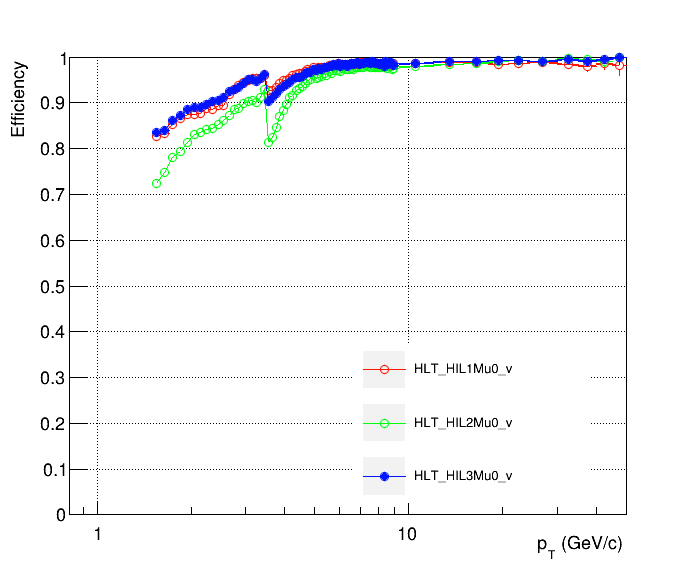

In [99]:
leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.51);leg.SetX2(0.85);leg.SetY1(0.12);leg.SetY2(0.4);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")
hist1 = f_out1.Get("HLT_HIL1Mu0_v/pt")
hist2 = f_out1.Get("HLT_HIL2Mu0_v/pt")
hist3 = f_out1.Get("HLT_HIL3Mu0_v/pt")

canv, leg = DrawTrigSeq(hist1, canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "HLT_HIL1Mu0_v")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(hist2, canv, _and = True, _col = getcolor(10), _leg = leg, _marker = 24, _disc = "HLT_HIL2Mu0_v")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(hist3, canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 20, _disc = "HLT_HIL3Mu0_v")# %s" % ver1)# v2-7-mod1")


# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.SetLogx()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_Simu_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_Simu_%s.png" % (pltdir, ver) )
leg.Clear()

Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pt_RateCut_Comp_Dimu_JPsiEMB_mod2_Gen_acc_finePtv2_11.pdf has been created
Info in <TCanvas::Print>: png file Eff_v2_11/Eff_pt_RateCut_Comp_Dimu_JPsiEMB_mod2_Gen_acc_finePtv2_11.png has been created


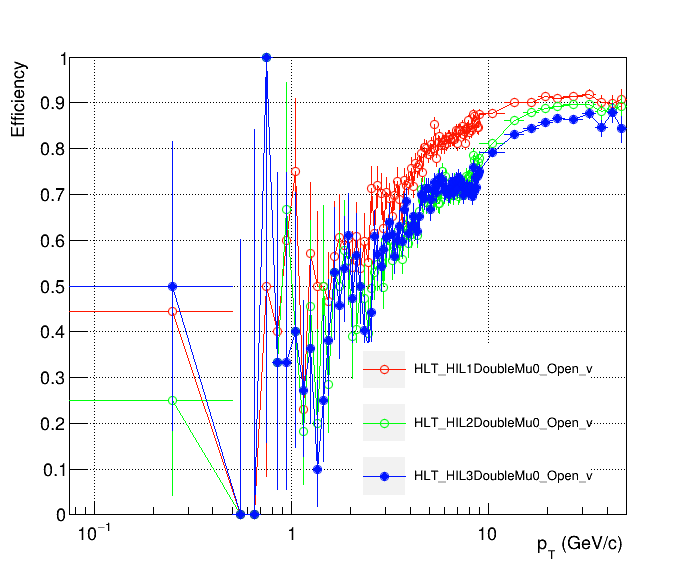

In [103]:
canv.Clear
leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.51);leg.SetX2(0.85);leg.SetY1(0.12);leg.SetY2(0.4);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")
hist1 = f_out1.Get("L1DoubleMuOpen/pt")
hist2 = f_out1.Get("L2DoubleMuOpen/pt")
hist3 = f_out1.Get("L3DoubleMuOpen/pt")
hist4 = f_out1.Get("L2DoubleMuOpen_fake/pt")
hist5 = f_out1.Get("L3DoubleMuOpen_fake/pt")


canv, leg = DrawTrigSeq(hist1, canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "HLT_HIL1DoubleMu0_Open_v")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(hist2, canv, _and = True, _col = getcolor(10), _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_Open_v")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(hist3, canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 20, _disc = "HLT_HIL3DoubleMu0_Open_v")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(hist4, canv, _and = True, _col = getcolor(30), _leg = leg, _marker = 20, _disc = "HLT_HIL2SingleMu0_Open_fake_v")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(hist5, canv, _and = True, _col = getcolor(2), _leg = leg, _marker = 20, _disc = "HLT_HIL3SingleMu0_Open_fake_v")# %s" % ver1)# v2-7-mod1")


# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.SetLogx()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_Dimu_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_Dimu_%s.png" % (pltdir, ver) )
leg.Clear()

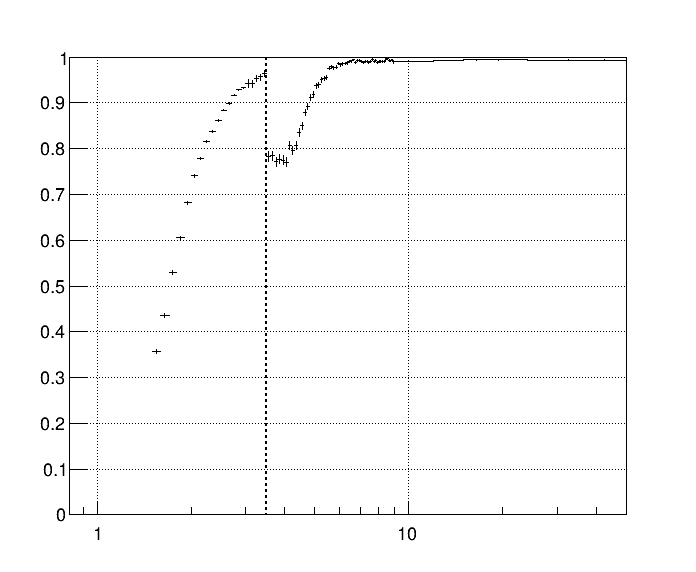

In [57]:
canv.Clear()
canv.cd()

a = TLine() 
a.SetLineWidth(2)
a.SetLineStyle(2)
hist3.Draw()
a.DrawLine(3.5,0, 3.5, 1)

canv.Draw()